In [11]:
# Load modules

import numpy as np
import matplotlib.pyplot as plt
import datetime

In [12]:
# Define functions

def cartesian_to_spherical(coords):   
    r = np.sqrt(coords[:,0]**2 + coords[:,1]**2 + coords[:,2]**2)
    phi = np.sign(coords[:,0]) * np.arccos(coords[:,1] / (np.sqrt(coords[:,0]**2 + coords[:,1]**2)))
    # theta = np.nan_to_num(x=theta)    - can use this for nan error if necessary
    theta = np.arccos(coords[:,2]/r)
    return np.array([r, theta, phi]).transpose()

def data_processing(data_path):
    # juice to callisto
    juice_wrt_callisto = np.loadtxt(data_path, delimiter=",", unpack=True)
    juice_wrt_callisto = juice_wrt_callisto.transpose()
    Xjc, Yjc, Zjc, vxjc, vyjc, vzjc, t = juice_wrt_callisto

    # convert positions to m
    juice_wrt_callisto_cart = 1e3 * np.array([Xjc, Yjc, Zjc]).transpose()

    juice_wrt_callisto_spher = cartesian_to_spherical(juice_wrt_callisto_cart)

    return [t, juice_wrt_callisto_cart, juice_wrt_callisto_spher]

def CA_info(orbit):
    min_index = np.argmin(orbit[4])
    return np.transpose(orbit)[min_index,:]

In [13]:
### Load in data from SPICE kernels, data loaded in has units km and km/s
# data paths
data_paths = []
data_path = "./spice_data/juice_wrt_callisto_cphio_J"

for i in range(1, 22):
    data_paths.append(data_path + str(i) + ".csv")

print(data_paths)

['./spice_data/juice_wrt_callisto_cphio_J1.csv', './spice_data/juice_wrt_callisto_cphio_J2.csv', './spice_data/juice_wrt_callisto_cphio_J3.csv', './spice_data/juice_wrt_callisto_cphio_J4.csv', './spice_data/juice_wrt_callisto_cphio_J5.csv', './spice_data/juice_wrt_callisto_cphio_J6.csv', './spice_data/juice_wrt_callisto_cphio_J7.csv', './spice_data/juice_wrt_callisto_cphio_J8.csv', './spice_data/juice_wrt_callisto_cphio_J9.csv', './spice_data/juice_wrt_callisto_cphio_J10.csv', './spice_data/juice_wrt_callisto_cphio_J11.csv', './spice_data/juice_wrt_callisto_cphio_J12.csv', './spice_data/juice_wrt_callisto_cphio_J13.csv', './spice_data/juice_wrt_callisto_cphio_J14.csv', './spice_data/juice_wrt_callisto_cphio_J15.csv', './spice_data/juice_wrt_callisto_cphio_J16.csv', './spice_data/juice_wrt_callisto_cphio_J17.csv', './spice_data/juice_wrt_callisto_cphio_J18.csv', './spice_data/juice_wrt_callisto_cphio_J19.csv', './spice_data/juice_wrt_callisto_cphio_J20.csv', './spice_data/juice_wrt_call

In [14]:
#orbit1 = data_processing('./spice_data/juice_wrt_callisto_C1.csv')
#orbit1 =  np.asarray(orbit1)
#print(orbit1)

In [15]:
orbits_all = {}

for i in range(len(data_paths)):
    t, cart, spher = data_processing(data_paths[i])
    z = np.c_[t, cart]
    z = np.c_[z, spher]
    orbits_all['orbit%s' % (i+1)] = np.transpose(z)

In [16]:
i = 1
CA_times_utc = []
CA_times_utc_min12hr = []
for orbit, vector in orbits_all.items():
    CA_info_vector = CA_info(vector)
    globals()['CA_orbit%s' % (i)] = CA_info_vector
    CA_time_utc = datetime.datetime(2000, 1, 1, 12, 0, 0) + datetime.timedelta(seconds=CA_info_vector[0])
    CA_time_utc_min12hr = CA_time_utc + datetime.timedelta(hours=-12)
    CA_times_utc.append(CA_time_utc)
    CA_times_utc_min12hr.append(CA_time_utc_min12hr)

    i += 1

for times in CA_times_utc_min12hr:
    print(times)

2032-06-20 12:39:18.368780
2032-07-28 13:51:18.366680
2032-08-14 06:15:18.365890
2032-09-10 07:26:18.364980
2032-09-27 00:00:18.364720
2032-10-13 16:29:18.364720
2032-10-30 08:54:18.365000
2032-11-16 01:17:18.365540
2032-12-02 17:37:18.366280
2033-02-24 04:09:18.370620
2033-03-12 20:32:18.371080
2033-05-10 04:10:18.370680
2033-06-04 06:39:18.369640
2033-06-20 23:02:18.368760
2033-07-07 15:24:18.367840
2033-07-24 07:47:18.366920
2033-08-10 00:15:18.366090
2033-11-01 11:01:18.365060
2034-02-14 12:09:18.370220
2034-05-01 10:26:18.370940
2034-06-23 17:15:18.368630


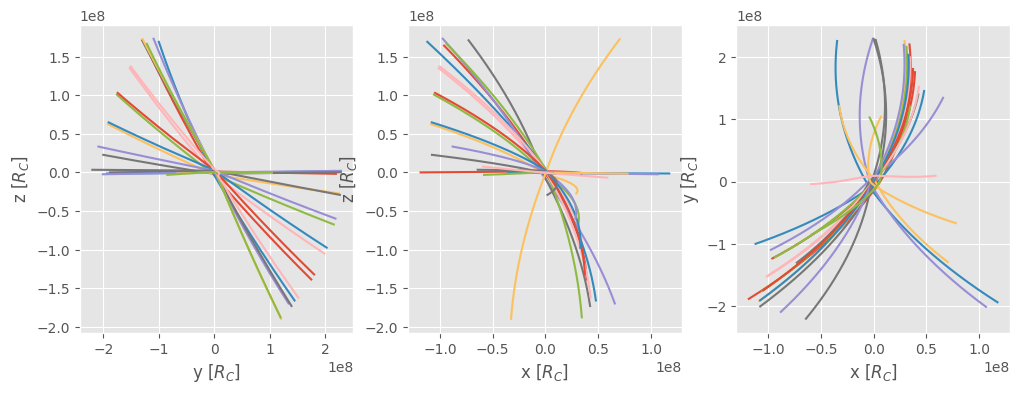

In [17]:
# Define a function to add a circle to a plot

def add_callisto_circle(ax):
    callisto = plt.Circle((0, 0), 1, color='black')
    ax.add_patch(callisto)
    return ax

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    axes[i] = add_callisto_circle(axes[i])

'''
# Defining and applying the common limits
common_xlim = (-3, 3)  
common_ylim = (-3, 3)
common_zlim = (-3, 3)

axes[0].set_xlim(common_xlim)
axes[0].set_ylim(common_ylim)

axes[1].set_xlim(common_xlim)
axes[1].set_ylim(common_zlim)

axes[2].set_xlim(common_ylim)
axes[2].set_ylim(common_zlim)
'''

# Set the labels
axes[2].set_xlabel('x [$R_C$]')
axes[2].set_ylabel('y [$R_C$]')

axes[1].set_xlabel('x [$R_C$]')
axes[1].set_ylabel('z [$R_C$]')

axes[0].set_xlabel('y [$R_C$]')
axes[0].set_ylabel('z [$R_C$]')

for orbit, vector in orbits_all.items():

    axes[0].plot(vector[2], vector[3])
    axes[1].plot(vector[1], vector[3])
    axes[2].plot(vector[1], vector[2])

    
    

719
5968457.500412716
63158.3687800169
2032-06-21 00:39:18.368780


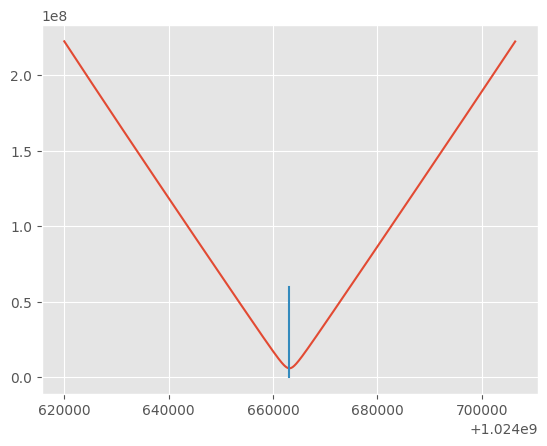

In [18]:
orbit1 = orbits_all['orbit1']
plt.plot(orbit1[0], orbit1[4])
minarg = np.argmin(orbit1[4])
print(minarg)
mintime = orbit1[0, minarg]
CA_i = orbit1.transpose()[minarg,:]
print(CA_i[4])
print(mintime-1.0246e9)
CA_time_utc = datetime.datetime(2000, 1, 1, 12, 0, 0) + datetime.timedelta(seconds=mintime)
CA_time_utc_min12hr = CA_time_utc + datetime.timedelta(hours=-12)
print(CA_time_utc)
plt.plot([mintime,mintime], [0,10*orbit1[4, minarg]])


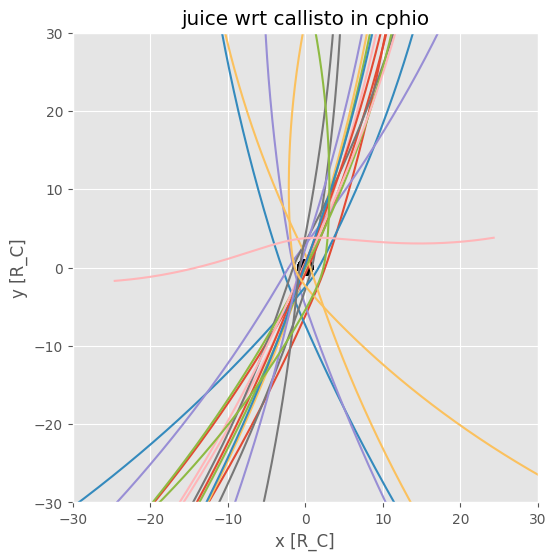

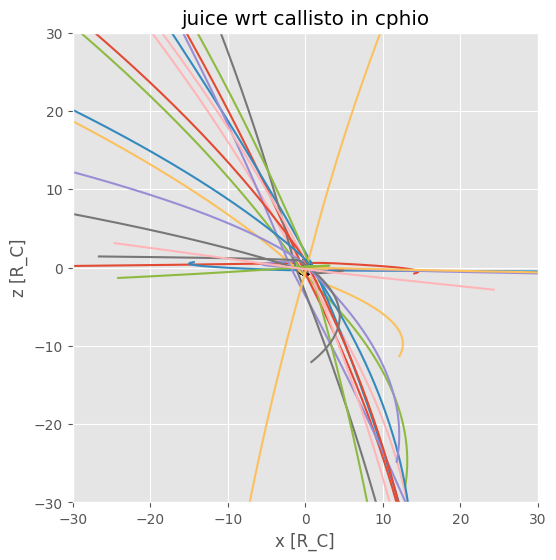

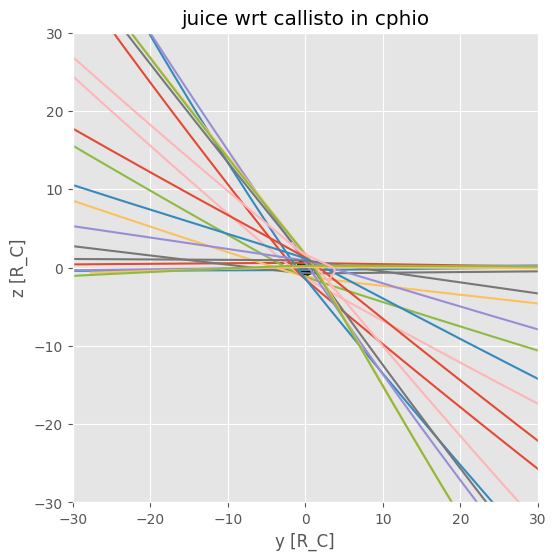

In [24]:

# Load modules

import numpy as np
import matplotlib.pyplot as plt
import datetime
# define constants

R_C = 2410.3 * 1e3
R_J = 71492 * 1e3
R_S = 696340 * 1e3
AU = 150000000 * 1e3
# Define functions

def cartesian_to_spherical(coords):   
    r = np.sqrt(coords[:,0]**2 + coords[:,1]**2 + coords[:,2]**2)
    phi = np.sign(coords[:,0]) * np.arccos(coords[:,1] / (np.sqrt(coords[:,0]**2 + coords[:,1]**2)))
    # theta = np.nan_to_num(x=theta)    - can use this for nan error if necessary
    theta = np.arccos(coords[:,2]/r)
    return np.array([r, theta, phi]).transpose()

def data_processing(data_path):
    # juice to callisto
    juice_wrt_callisto = np.loadtxt(data_path, delimiter=",", unpack=True)
    juice_wrt_callisto = juice_wrt_callisto.transpose()
    Xjc, Yjc, Zjc, vxjc, vyjc, vzjc, t = juice_wrt_callisto

    # convert positions to m
    juice_wrt_callisto_cart = 1e3 * np.array([Xjc, Yjc, Zjc]).transpose()

    juice_wrt_callisto_spher = cartesian_to_spherical(juice_wrt_callisto_cart)

    return [t, juice_wrt_callisto_cart, juice_wrt_callisto_spher]

def CA_info(orbit):
    min_index = np.argmin(orbit[4])
    CA_info_vector_i = np.transpose(orbit)[min_index,:]
    CA_info_vector_i = np.append(CA_info_vector_i, min_index)
    return CA_info_vector_i


### Load in data from SPICE kernels, data loaded in has units km and km/s
# data paths
data_paths = []
data_path = "./spice_data/juice_wrt_callisto_cphio_J"

for i in range(1, 22):
    data_paths.append(data_path + str(i) + ".csv")

#print(data_paths)

orbits_all = {}

for i in range(len(data_paths)):
    t, cart, spher = data_processing(data_paths[i])
    z = np.c_[t, cart]
    z = np.c_[z, spher]
    orbits_all['orbit%s' % (i+1)] = np.transpose(z)


i = 1
CA_times_utc = []
CA_times_utc_min12hr = []
for orbit, vector in orbits_all.items():
    CA_info_vector = CA_info(vector)
    i += 1


for times in CA_times_utc_min12hr:
    print(times)

i = 1
closest_approach_vectors = {}

for orbit, vector in orbits_all.items():
    CA_info_vector = CA_info(vector)
    closest_approach_vectors['CA_orbit%s' % (i)] = CA_info_vector

    i += 1
data_paths_JSO = []
data_path_JSO = "./spice_data/callisto_wrt_jupiter_jupsunorb_J"

for i in range(1, 22):
    data_paths_JSO.append(data_path_JSO + str(i) + ".csv")


orbits_all_JSO = {}

for i in range(len(data_paths_JSO)):
    t, cart, spher = data_processing(data_paths_JSO[i])
    z = np.c_[t, cart]
    z = np.c_[z, spher]
    orbits_all_JSO['orbit%s' % (i+1)] = np.transpose(z)

closest_approach_vectors_JSO = {}
i = 1

for orbit, vector in orbits_all_JSO.items():
    orbit_i = np.transpose(vector)
    minindex = int(closest_approach_vectors['CA_orbit%s' % (i)][7])
    closest_approach_vectors_JSO['CA_orbit%s' % (i)] = orbit_i[minindex]

    i += 1
def add_body_circle(ax, scaling=1):
    body = plt.Circle((0, 0), scaling, color='black')
    ax.add_patch(body)
    return ax

def get_orbit_data(target, reference_point, frame):
    datapath = "./spice_data/" + target + "_wrt_" + reference_point + "_" + frame + "_J"
    data_paths_i = []

    for i in range(1, 22):
        data_paths_i.append(datapath + str(i) + ".csv")

    orbits_all_i = {}

    for i in range(len(data_paths_i)):
        t, cart, spher = data_processing(data_paths_i[i])
        z = np.c_[t, cart]
        z = np.c_[z, spher]
        orbits_all_i['orbit%s' % (i+1)] = np.transpose(z)
    return orbits_all_i

def get_closest_approach_data(target, reference_point, frame):
    orbits_all_i = get_orbit_data(target, reference_point, frame)
    closest_approach_vectors_i = {}
    i = 1

    for orbit, vector in orbits_all_i.items():
        orbit_i = np.transpose(vector)
        minindex = int(closest_approach_vectors['CA_orbit%s' % (i)][7])
        closest_approach_vectors_i['CA_orbit%s' % (i)] = orbit_i[minindex]

        i += 1
    return closest_approach_vectors_i


def frame_plotter_xyz(target, reference_point, frame, scale=True):
    orbits_all = get_orbit_data(target, reference_point, frame)
    closest_approach_vectors_i = get_closest_approach_data(target, reference_point, frame)

    fig1, ax1 = plt.subplots(figsize=(6,6.1)) ; fig2, ax2 = plt.subplots(figsize=(6,6.1)) ; fig3, ax3 = plt.subplots(figsize=(6,6.1))

    # Defining and applying the common limits
    lim=30

    common_xlim = (-lim, lim)  
    common_ylim = (-lim, lim) 
    common_zlim = (-lim, lim)

    ax1.set_xlim(common_xlim)
    ax1.set_ylim(common_ylim)

    ax2.set_xlim(common_xlim)
    ax2.set_ylim(common_zlim)

    ax3.set_xlim(common_ylim)
    ax3.set_ylim(common_zlim)

    graph_title = target + " wrt " + reference_point + " in " + frame

    if reference_point == 'callisto':
        unit = 'R_C'
        unit_scaling = R_C
        body_scaling = 1
    elif reference_point == 'jupiter':
        unit = 'R_J'
        unit_scaling = R_J
        body_scaling = 1
        xlims = 30 * R_J
    elif reference_point == 'sun':
        unit = 'AU'
        unit_scaling = AU
        body_scaling = R_S/AU

    ax1.set_title(graph_title) ; ax1.set_xlabel('x ['+ unit + ']') ; ax1.set_ylabel('y ['+ unit + ']')
    ax2.set_title(graph_title) ; ax2.set_xlabel('x ['+ unit + ']') ; ax2.set_ylabel('z ['+ unit + ']')
    ax3.set_title(graph_title) ; ax3.set_xlabel('y ['+ unit + ']') ; ax3.set_ylabel('z ['+ unit + ']')

    for orbit, vector in orbits_all.items():
        if scale == True:
            vector[1:4] = vector[1:4] / unit_scaling

        add_body_circle(ax1, scaling = body_scaling)
        add_body_circle(ax2, scaling = body_scaling)
        add_body_circle(ax3, scaling = body_scaling)

        ax1.plot(vector[1], vector[2])
        ax2.plot(vector[1], vector[3])
        ax3.plot(vector[2], vector[3])
    '''
    for orbit, vector in closest_approach_vectors_i.items():
        if scale == True:
            vector[1:4] = vector[1:4] / unit_scaling

        ax1.plot(vector[1], vector[2], '*') ; add_body_circle(ax1, scaling = body_scaling)
        ax2.plot(vector[1], vector[3], '*') ; add_body_circle(ax2, scaling = body_scaling)
        ax3.plot(vector[2], vector[3], '*') ; add_body_circle(ax3, scaling = body_scaling)
    '''

plt.style.use('ggplot')

frame_plotter_xyz('juice', 'callisto', 'cphio')
#frame_plotter_xyz('callisto', 'jupiter', 'jupsunorb')
#frame_plotter_xyz('callisto', 'jupiter', 'SIII_mag')
#frame_plotter_xyz('jupiter', 'sun', 'IAU_SUN')


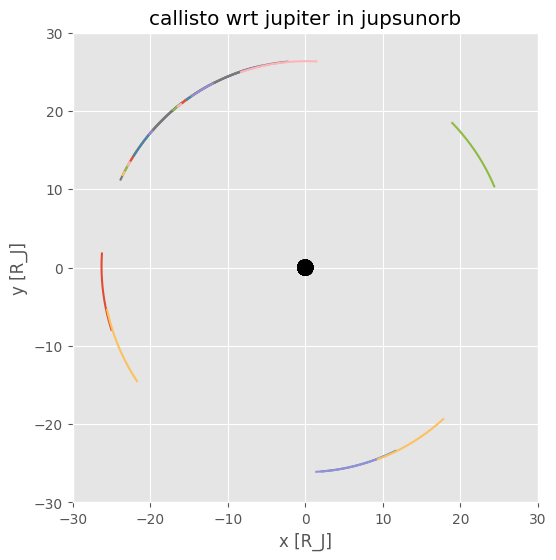

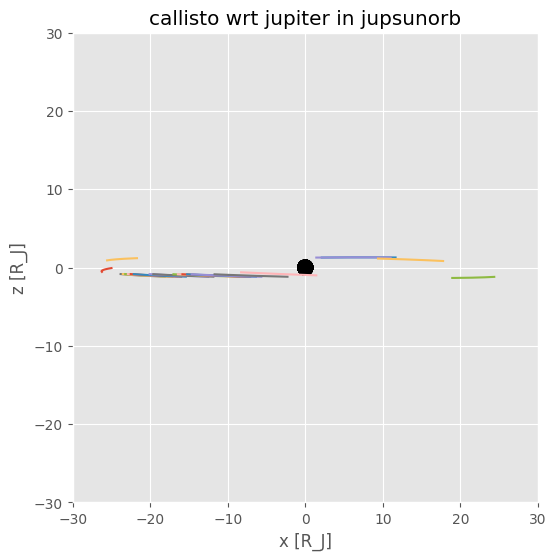

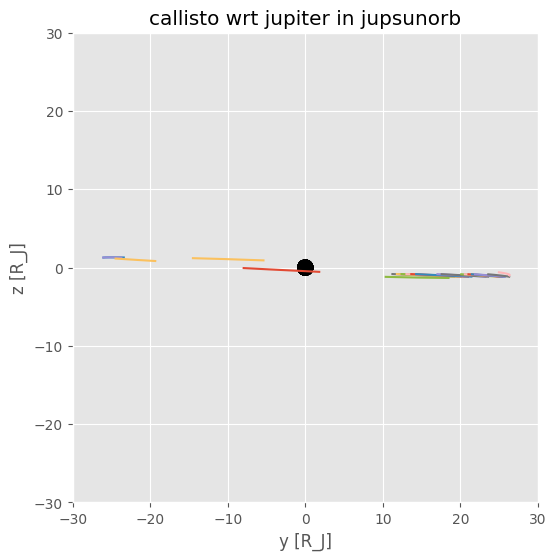

In [25]:
frame_plotter_xyz('callisto', 'jupiter', 'jupsunorb')

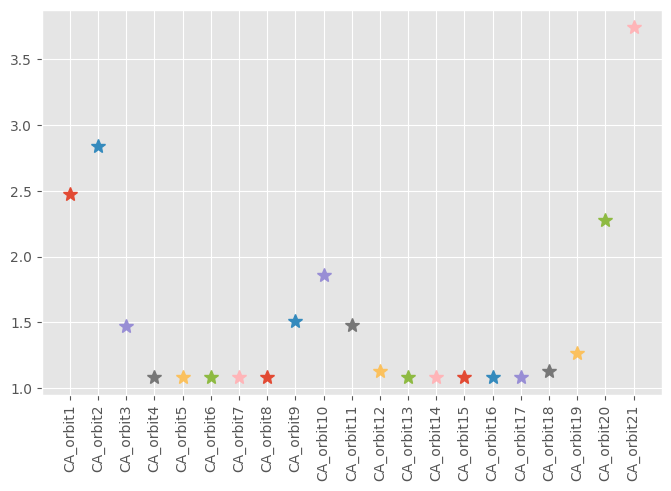

In [21]:
import matplotlib.dates as mdates

CA_data = get_closest_approach_data('juice', 'callisto', 'cphio')

fig, ax = plt.subplots(figsize=(8,5))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


for orbit, vector in CA_data.items():
        vector[1:5] = vector[1:5] / R_C

        ax.plot(orbit,vector[4], '*', markersize=10)
